In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
##### Load dataset ######
file_path_data = "TCGAdata.txt"
file_path_labels = "TCGAlabels.txt"

df_data = pd.read_csv(
    file_path_data, 
    delim_whitespace=True,  # Use whitespace as the delimiter
    header=0,               # Use the first line as the header
    quotechar='"'           # Specify the quote character used
)

df_labels = pd.read_csv(
    file_path_labels, 
    delim_whitespace=True,  
    header=0,               
    quotechar='"'           
)

df = pd.merge(df_data, df_labels, left_index=True, right_index=True, how='left')

df.head(1)
print(df.shape)

##### Center and Normalize ######

# Last column is the label
features = df.iloc[:, :-1] 
labels = df.iloc[:, -1]  
print(df.shape)

# Centering and normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
#print(features_scaled.mean())
#print(features.mean())

# Convert the normalized features back to a DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Reattach the labels to the features DataFrame
final_df = pd.concat([features_scaled_df, labels.reset_index(drop=True)], axis=1)

# Show the first few rows of the final, normalized dataset
print(final_df.head())

C:\Users\tussa\AppData\Local\Temp\ipykernel_6376\1741947550.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_data = pd.read_csv(


(2887, 2001)
(2887, 2001)
         V1        V2        V3        V4        V5        V6        V7  \
0 -1.715940  1.217289 -0.778058 -0.449348 -0.643175  1.626182  1.326347   
1 -4.888000 -0.103819 -0.778058 -1.891912 -0.949149 -0.077379 -0.108216   
2 -1.253872 -0.035045 -0.778058  0.010001 -0.108216  0.463993  0.623136   
3 -0.853313 -0.372010 -0.778058 -0.316451 -0.365051 -0.107704 -1.329117   
4  2.059144  0.439639 -0.778058 -0.288603  0.668848 -1.003692  0.080642   

         V8         V9       V10  ...     V1992     V1993     V1994     V1995  \
0  0.689276  14.728014 -0.169078  ... -0.569072  0.197018 -1.202524 -2.034733   
1 -0.360422  -0.123994 -0.169078  ... -0.445065  1.678946 -1.202524 -3.909225   
2 -1.125541   9.050189 -0.169078  ... -0.567281  0.036671 -1.202524 -0.363149   
3  0.273341  -0.123994 -0.169078  ... -0.935919 -0.663160 -1.202524  0.720660   
4 -0.796653  -0.123994 -0.169078  ... -0.048958  0.438989 -0.364075 -0.696148   

      V1996     V1997     V1998     

C:\Users\tussa\AppData\Local\Temp\ipykernel_6376\1741947550.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_labels = pd.read_csv(


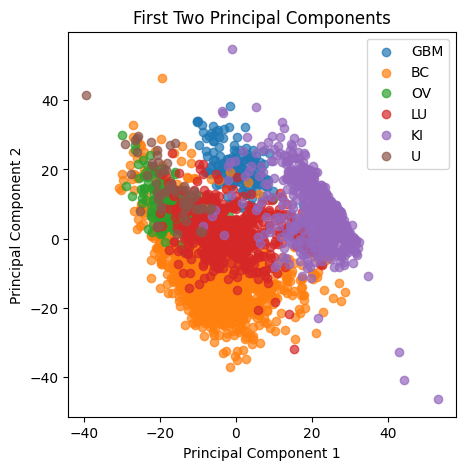

In [8]:
X = final_df.iloc[:, :-1]  # Features (all columns except the last one)
y = final_df.iloc[:, -1]   # Labels (the last column)

pca = PCA(n_components=4)
principal_components = pca.fit_transform(X)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])

final_principal_df = pd.concat([principal_df, y], axis=1)

# Create a dictionary to map each label to a unique color
label_color_map = {
    label: plt.cm.tab10(i) for i, label in enumerate(final_principal_df[y.name].unique())
}

# Plotting
plt.figure(figsize=(5, 5))
for label, color in label_color_map.items():
    subset_df = final_principal_df[final_principal_df[y.name] == label]
    plt.scatter(subset_df['PC1'], subset_df['PC2'], color=color, label=label, alpha=0.7)

# Add labels and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components')
plt.legend()

# Show plot
plt.show()

